In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import imageio
import matplotlib.image as mpimg
from pylab import *
import scipy.ndimage as nd
import scipy as sp
from PIL import Image 
from scipy.ndimage.filters import convolve, gaussian_filter
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76, rgb2gray
from scipy import spatial
from numpy import asarray
import warnings 
import math
warnings.filterwarnings('ignore')
%matplotlib inline

**Color Features**

In [ ]:
#upload gambar sesuai dengan keinginana anda, disini saya menggunakan gambar buah
image = cv2.imread('buah.jpg')
#lalu tampilkan type , size, dan data gambar
data = asarray(image)
image2 = Image.fromarray(data)
print(type(image2))

print(data)
#cetak detail gambar
print(image2.mode)
print(image2.size)


<class 'PIL.Image.Image'>
[[[ 66 112 237]
  [ 76 120 245]
  [ 88 129 252]
  ...
  [ 69  84 103]
  [ 76  90 109]
  [ 79  93 112]]

 [[ 89 136 255]
  [ 87 131 254]
  [ 97 138 255]
  ...
  [ 65  80  99]
  [ 84  98 117]
  [ 87 101 120]]

 [[ 84 129 250]
  [ 72 118 236]
  [ 86 129 248]
  ...
  [ 84  99 118]
  [ 86 100 119]
  [ 88 102 121]]

 ...

 [[ 75  63 199]
  [ 70  58 194]
  [ 78  64 199]
  ...
  [ 49  92 209]
  [ 50  94 211]
  [ 50  94 211]]

 [[ 77  65 201]
  [ 68  56 192]
  [ 72  58 193]
  ...
  [ 48  92 209]
  [ 53  97 214]
  [ 53  97 214]]

 [[ 74  62 198]
  [ 66  54 190]
  [ 75  61 196]
  ...
  [ 48  92 209]
  [ 50  94 211]
  [ 50  94 211]]]
RGB
(618, 412)


Warna gambar terlihat agak kabur. Karena secara default, OpenCV membaca gambar dalam urutan Biru Hijau Merah (BGR). Jadi, untuk melihat gambar sebenarnya kita perlu mengubah rendering ke Red Green Blue (RGB).

The type of this input is <class 'numpy.ndarray'>
Shape: (412, 618, 3)
[[[ 66 112 237]
  [ 76 120 245]
  [ 88 129 252]
  ...
  [ 69  84 103]
  [ 76  90 109]
  [ 79  93 112]]

 [[ 89 136 255]
  [ 87 131 254]
  [ 97 138 255]
  ...
  [ 65  80  99]
  [ 84  98 117]
  [ 87 101 120]]

 [[ 84 129 250]
  [ 72 118 236]
  [ 86 129 248]
  ...
  [ 84  99 118]
  [ 86 100 119]
  [ 88 102 121]]

 ...

 [[ 75  63 199]
  [ 70  58 194]
  [ 78  64 199]
  ...
  [ 49  92 209]
  [ 50  94 211]
  [ 50  94 211]]

 [[ 77  65 201]
  [ 68  56 192]
  [ 72  58 193]
  ...
  [ 48  92 209]
  [ 53  97 214]
  [ 53  97 214]]

 [[ 74  62 198]
  [ 66  54 190]
  [ 75  61 196]
  ...
  [ 48  92 209]
  [ 50  94 211]
  [ 50  94 211]]]


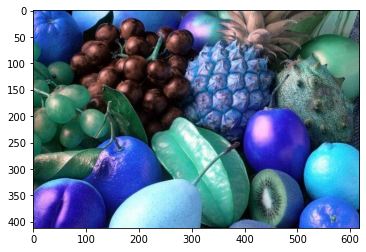

In [ ]:
#tampilkan type dan shape gambar
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)
data = asarray(image)
print(data)

[[[237 112  66]
  [245 120  76]
  [252 129  88]
  ...
  [103  84  69]
  [109  90  76]
  [112  93  79]]

 [[255 136  89]
  [254 131  87]
  [255 138  97]
  ...
  [ 99  80  65]
  [117  98  84]
  [120 101  87]]

 [[250 129  84]
  [236 118  72]
  [248 129  86]
  ...
  [118  99  84]
  [119 100  86]
  [121 102  88]]

 ...

 [[199  63  75]
  [194  58  70]
  [199  64  78]
  ...
  [209  92  49]
  [211  94  50]
  [211  94  50]]

 [[201  65  77]
  [192  56  68]
  [193  58  72]
  ...
  [209  92  48]
  [214  97  53]
  [214  97  53]]

 [[198  62  74]
  [190  54  66]
  [196  61  75]
  ...
  [209  92  48]
  [211  94  50]
  [211  94  50]]]


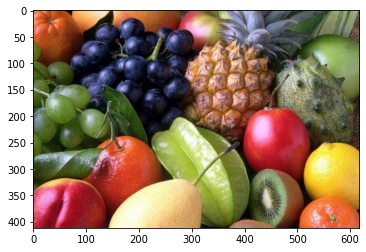

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
data = asarray(image_rgb)
print(data)

[[144 152 161 ...  88  94  97]
 [166 163 168 ...  84 102 105]
 [160 148 160 ... 103 104 106]
 ...
 [105 100 106 ... 122 124 124]
 [107  98 100 ... 122 127 127]
 [104  96 103 ... 122 124 124]]


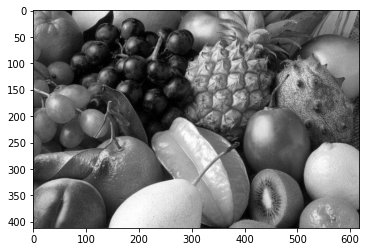

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
data = asarray(gray_image)
print(data)

saya menggunakan metode pengubahan ukuran yang disediakan oleh cv2. 

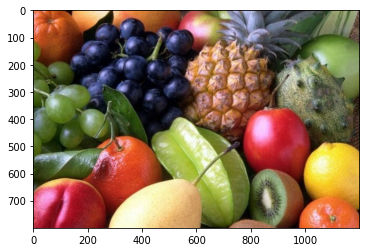

In [ ]:
resized_image = cv2.resize(image_rgb, (1200, 800))
plt.imshow(resized_image)

**Color Detector**

Pertama saya akan menentukan fungsi yang akan mengubah RGB menjadi hex sehingga dapat menggunakannya sebagai label untuk diagram lingkaran nantinya.

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

Selanjutnya, saya mendapatkan gambar yang nanti dimasukkan ke dalam ruang RGB

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

Saya merisize gambar dengna ukuran 600x400. Sebenarnya gak perlu mengubah ukurannya menjadi ukuran yang lebih kecil tapi saya  melakukannya untuk mengurangi piksel yang akan mengurangi waktu yang diperlukan untuk mengekstrak warna dari gambar. KMeans disini mengharapkan inputan gambar menjadi dua dimensi, jadi saya menggunakan fungsi pembentukan kembali array untuk membentuk kembali data gambar.

In [ ]:
modified_image = cv2.resize(image_rgb, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

Algoritme KMeans membuat cluster berdasarkan jumlah cluster yang disediakan, kemudian menyesuaikan dan memprediksi pada gambar yang sama untuk mengekstrak prediksi tersebut ke dalam label variabel

In [ ]:
#tentukan mau menjadi berapa cluster
clf = KMeans(n_clusters = 10)
labels = clf.fit_predict(modified_image)

Saya menggunakan Counter untuk menghitung semua label. Untuk menemukan warna, disini saya menggunakan clf.cluster_centers_. ordered_colors mengulangi key yang ada dalam hitungan, lalu membagi setiap nilai dengan 255. Selanjutnya, saya mendapatkan warna hex dan rgb. Saat saya membagi setiap warna dengan 255 sebelumnya, sekarang saya mengalikannya dengan 255 lagi sambil mencari warna.

Jika show_chart adalah True, maka memplot diagram lingkaran dengan setiap bagian diagram lingkaran yang ditentukan menggunakan count.values ​​(), label sebagai hex_colors dan warna sebagai warna_order.

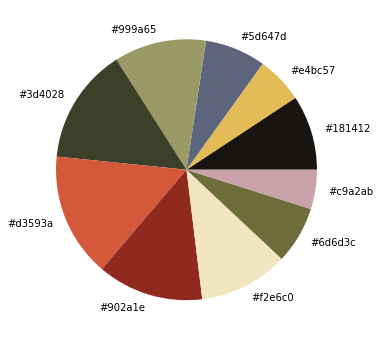

In [ ]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]
if (True):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

**Edge Detector**

**Roberts Cross Edge Detector**

Import gambar, disini saya menggunakan gambar artis. dan nantinya gambar harus di convert ke grayscale

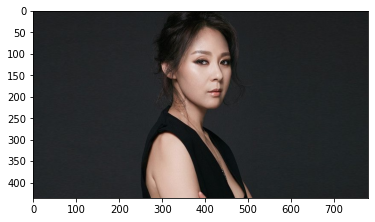

In [ ]:
image = cv2.imread('artis.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

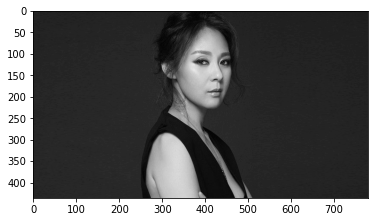

In [ ]:
gray_image = cv2.imread('artis.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_image, cmap='gray')

Deklarasi array matrix horizontal dan vertikal untuk roberts kernels

In [ ]:
Gx = np.array( [[ 0, 0, 0 ],
                [ 0, 1, 0 ],
                [ 0, 0,-1 ]] )

Gy = np.array( [[ 0, 0, 0 ],
                [ 0, 0, 1 ],
                [ 0,-1, 0 ]] )

Membuat fungsi konvolusi kernel




In [ ]:
#dengan image X dan filter F
def konvolusi(X, F):
    #tinggi dan lebar gambar
    X_height = X.shape[0]
    X_width = X.shape[1]
    
    #tinggi dan lebar filter
    F_height = F.shape[0]
    F_width = F.shape[1]
    
    H = (F_height - 1) // 2
    W = (F_width - 1) // 2
    
    #keluaran yaitu matrix array dengan lebar dan tinggi
    out = np.zeros((X_height, X_width))
    #iterasi pada semua piksel gambar X
    for i in np.arange(H, X_height-H):
        for j in np.arange(W, X_width-W):
            sum = 0
            #iterasi pada filter
            for k in np.arange(-H, H+1):
                for l in np.arange(-W, W+1):
                    #dapatkan nilai yang sesuai dari gambar dan filter
                    a = X[i+k, j+l]
                    w = F[H+k, W+l]
                    sum += (w * a)
            out[i,j] = sum
    #konvolusi kembali 
    return out

In [ ]:
#normalisasi vector
rob_x = konvolusi(gray_image, Gx)
rob_y = konvolusi(gray_image, Gy)

Komponen gradient di setiap orientasi kemudian digabungkan bersama untuk menemukan besaran absolut dari gradient pada setiap titik dan orientasi gradient tersebut.

In [ ]:
#hitung besarnya gradien vektor
output_image = np.sqrt( np.square(rob_y) + np.square(rob_x))
#memetakan nilai dari 0 hingga 255
output_image = (output_image/ np.max(output_image)) * 255

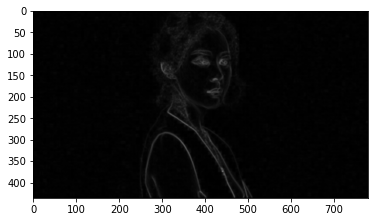

In [ ]:
#tampilkan hasil gambar
cv2.imwrite('artis.jpg', output_image)
plt.imshow(output_image, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [ ]:
#tampilkan array setelah proses robert cross edge detector
data = asarray(output_image)
print(data)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         4.60121764 3.91028309 ... 1.53373921 1.53373921 0.        ]
 [0.         1.0845174  1.0845174  ... 1.53373921 1.53373921 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


**Sobel Edge Detector**

Import gambar, disini saya menggunakan gambar artis. dan nantinya gambar harus di convert ke grayscale

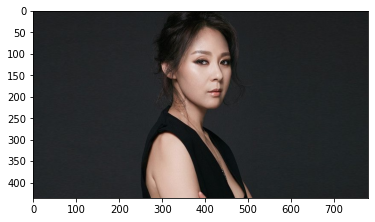

In [ ]:
image = cv2.imread('artis1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

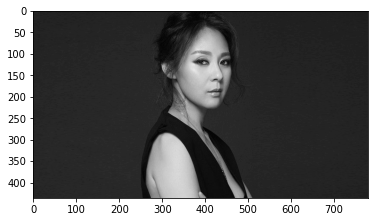

In [ ]:
gray_image = cv2.imread('artis1.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_image, cmap='gray')

Deklarasi array matrix horizontal dan vertikal untuk sobel kernels

In [ ]:
Px = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
Py = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

Membuat fungsi konvolusi kernel

In [ ]:
#dengan image X dan filter F
def konvolusi(X, F):
    #tinggi dan lebar gambar
    X_height = X.shape[0]
    X_width = X.shape[1]
    
    #tinggi dan lebar filter
    F_height = F.shape[0]
    F_width = F.shape[1]
    
    H = (F_height - 1) // 2
    W = (F_width - 1) // 2
    
    #keluaran yaitu matrix array dengan lebar dan tinggi
    out = np.zeros((X_height, X_width))
    #iterasi pada semua piksel gambar X
    for i in np.arange(H, X_height-H):
        for j in np.arange(W, X_width-W):
            sum = 0
            #iterasi pada filter
            for k in np.arange(-H, H+1):
                for l in np.arange(-W, W+1):
                    #dapatkan nilai yang sesuai dari gambar dan filter
                    a = X[i+k, j+l]
                    w = F[H+k, W+l]
                    sum += (w * a)
            out[i,j] = sum
    #konvolusi kembali  
    return out

In [ ]:
#normalisasi vector
sob_x = konvolusi(gray_image,Px) / 8.0
sob_y = konvolusi(gray_image,Py) / 8.0

Komponen gradient di setiap orientasi kemudian digabungkan bersama untuk menemukan besaran absolut dari gradient pada setiap titik dan orientasi gradient tersebut.

In [ ]:
#hitung besarnya gradien vektor
sob_out = np.sqrt(np.power(sob_x, 2) + np.power(sob_y, 2))
#memetakan nilai dari 0 hingga 255
sob_out = (sob_out / np.max(sob_out)) * 255

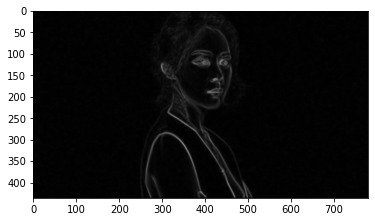

In [ ]:
#tampilkan hasil gambar
cv2.imwrite('artis1.jpg', sob_out)
plt.imshow(sob_out, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [ ]:
#tampilkan array setelah proses sobel edge detector
data = asarray(sob_out)
print(data)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.47506136 1.34367644 ... 1.7128581  1.34367644 0.        ]
 [0.         5.37470576 3.71034784 ... 2.68735288 2.68735288 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


**Canny Edge Detector**

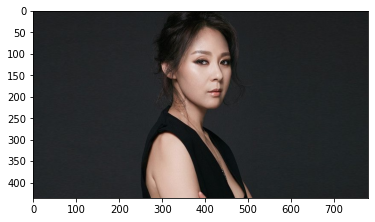

In [ ]:
#import gambar yang diinginkan
image = cv2.imread('artis2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Membuat fungsi canny edge detector

In [ ]:
def CannyEdgeDetector(im, blur = 1, highThreshold = 91, lowThreshold = 31):
    #Ubah menjadi float untuk mencegah nilai kliping
    im = np.array(im, dtype=float) 

    #Gaussian blur untuk mengurangi noise
    im2 = gaussian_filter(im, blur)

    #Gunakan filter sobel untuk mendapatkan gradien horizontal dan vertikal
    im3h = convolve(im2,[[-1,0,1],[-2,0,2],[-1,0,1]]) 
    im3v = convolve(im2,[[1,2,1],[0,0,0],[-1,-2,-1]])

    #Dapatkan gradient and direction
    grad = np.power(np.power(im3h, 2.0) + np.power(im3v, 2.0), 0.5)
    theta = np.arctan2(im3v, im3h)
    thetaQ = (np.round(theta * (5.0 / np.pi)) + 5) % 5 #Menghitung direction
    #Non-maximum suppression
    gradSup = grad.copy()
    for r in range(im.shape[0]):
        for c in range(im.shape[1]):
            #Tekan piksel di tepi gambar
            if r == 0 or r == im.shape[0]-1 or c == 0 or c == im.shape[1] - 1:
                gradSup[r, c] = 0
                continue
            tq = thetaQ[r, c] % 4

            if tq == 0: #0 is E-W (horizontal)
                if grad[r, c] <= grad[r, c-1] or grad[r, c] <= grad[r, c+1]:
                    gradSup[r, c] = 0
            if tq == 1: #1 is NE-SW
                if grad[r, c] <= grad[r-1, c+1] or grad[r, c] <= grad[r+1, c-1]:
                    gradSup[r, c] = 0
            if tq == 2: #2 is N-S (vertical)
                if grad[r, c] <= grad[r-1, c] or grad[r, c] <= grad[r+1, c]:
                    gradSup[r, c] = 0
            if tq == 3: #3 is NW-SE
                if grad[r, c] <= grad[r-1, c-1] or grad[r, c] <= grad[r+1, c+1]:
                    gradSup[r, c] = 0
                    #Double threshold
    strongEdges = (gradSup > highThreshold)

    #Apabila kuat memiliki value 2, dan jika lemah memiliki value 1
    thresholdedEdges = np.array(strongEdges, dtype=np.uint8) + (gradSup > lowThreshold)

    #Telusuri edge dengan hysteresis
    #Menemukan edge pixel lemah dan edge pixel kuat
    finalEdges = strongEdges.copy()
    currentPixels = []
    for r in range(1, im.shape[0]-1):
        for c in range(1, im.shape[1]-1):
            if thresholdedEdges[r, c] != 1:
                continue #bukan pixel yang lemah

            #Dapatkan 3x3 patch
            localPatch = thresholdedEdges[r-1:r+2,c-1:c+2]
            patchMax = localPatch.max()
            if patchMax == 2:
                currentPixels.append((r, c))
                finalEdges[r, c] = 1

    #Perpanjang tepi yang kuat berdasarkan piksel saat ini
    while len(currentPixels) > 0:
        newPix = []
        for r, c in currentPixels:
            for dr in range(-1, 2):
                for dc in range(-1, 2):
                    if dr == 0 and dc == 0: continue
                    r2 = r+dr
                    c2 = c+dc
                    if thresholdedEdges[r2, c2] == 1 and finalEdges[r2, c2] == 0:
                        #Salin piksel yang lemah ini ke hasil akhir
                        newPix.append((r2, c2))
                        finalEdges[r2, c2] = 1
        currentPixels = newPix

    return finalEdges

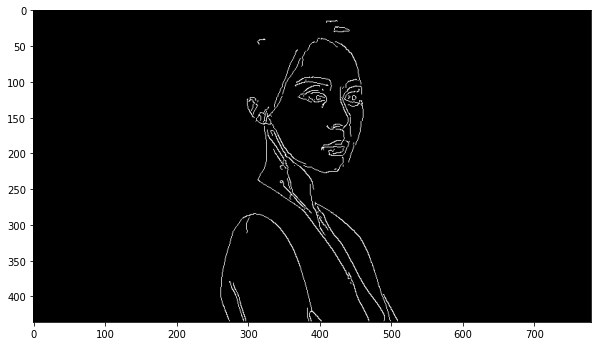

In [ ]:
im = cv2.imread("artis2.jpg", 0) #tampilkan hasil gambar
finalEdges = CannyEdgeDetector(im)
plt.figure(figsize=(10,10))
plt.imshow(finalEdges, cmap='gray')

In [ ]:
#tampilkan array setelah proses canny edge detector
data = asarray(im)
print(data)

[[32 32 33 ... 31 31 31]
 [36 35 35 ... 31 31 31]
 [32 32 32 ... 30 30 30]
 ...
 [38 38 38 ... 33 33 33]
 [38 38 38 ... 33 33 33]
 [38 38 38 ... 33 33 33]]


**Zero Crossing Detector**

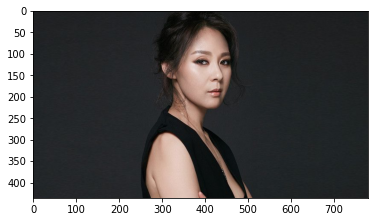

In [ ]:
face=imageio.imread('artis3.jpg')
plt.imshow(face)

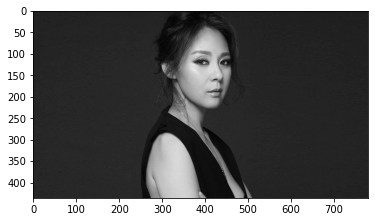

In [ ]:
gray=imageio.imread('artis3.jpg',pilmode='L')
plt.imshow(gray,cmap=plt.get_cmap('gray'))

In [ ]:
#menampilkan shape gambar
face.shape

(436, 780, 3)

In [ ]:
#menampilkan shape gambar gray
gray.shape

(436, 780)

In [ ]:
#menggunakan laplican of gaussian
LoG = nd.gaussian_laplace(gray, 2)
#menggunakan variabel thres(threshold) lalu dikalikan dengna 0*75
thres = np.absolute(LoG).mean() * 0.75
output = sp.zeros(LoG.shape)
w = output.shape[1]
h = output.shape[0]
#proses laplican of gaussian
for y in range(1, h - 1):
    for x in range(1, w - 1):
        patch = LoG[y-1:y+2, x-1:x+2]
        p = LoG[y, x]
        maxP = patch.max() #bernilai max
        minP = patch.min() #bernilai min
        if (p > 0):
            zeroCross = True if minP < 0 else False
        else:
            zeroCross = True if maxP > 0 else False
        if ((maxP - minP) > thres) and zeroCross:
            output[y, x] = 1

In [ ]:
#menampilkan array dari laplican of gaussian yang telah diproses sebelumnya
LoG 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

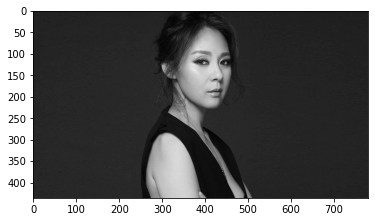

In [ ]:
#menampilkan gambar gray
gray=imageio.imread('artis3.jpg',pilmode='L') 
plt.imshow(gray,cmap=plt.get_cmap('gray'))

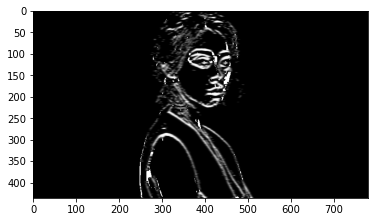

In [ ]:
#hasil gambar yang diproses dari Laplican of gaussian
plt.imshow(LoG,cmap=plt.get_cmap('gray'))

In [ ]:
#tampilkan array setelah proses zero cross edge detector
data = asarray(LoG)
print(data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Corner Detector**

Membuat fungsi Corner Detector menggunakan metode Harris Corner

In [ ]:
def findHarrisCorner(image, window_size = 5, k = 0.04, thres = 10000):
    
    # mencari gradien gambar 
    
    # turunan sobel X dan Y
    dx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
    dy = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)
    
    # membuat turunan
    Ixx = dx**2 
    Iyy = dy**2
    Ixy = dx * dy
    
    height = image.shape[0] # tinggi gambar
    width = image.shape[1] # panjang gambar
    
    newImg = image.copy()
    
    color_img = cv2.cvtColor(newImg, cv2.COLOR_GRAY2RGB) #konversi gray ke rgb 
    offset = int(window_size / 2) 
    
    #loop melalui gambar dan cari corner
    for y in range(offset, height-offset):
            for x in range(offset, width-offset):
                
                # pergeseran intensitas
                windowIxx = Ixx[y - offset:y + offset + 1, x - offset:x + offset + 1]
                windowIxy = Ixy[y - offset:y + offset + 1, x - offset:x + offset + 1]
                windowIyy = Iyy[y - offset:y + offset + 1, x - offset:x + offset + 1]
                
                # hitung jumlah kuadrat 
                Sxx = windowIxx.sum()
                Syy = windowIyy.sum()
                Sxy = windowIxy.sum()
                
                # menemukan determinan dan tanda yang digunakan untuk mendapatkan sudut
                det = (Sxx * Syy) - (Sxy**2)
                trace = Sxx + Syy
                
                # skor response 
                R = det - k * (trace**2)
                
                #jika respon corner melebihi ambang batas maka warnai (merah) sebagai lokasi titik
                if R > thres:
                    color_img.itemset((y, x, 0), 255)
                    color_img.itemset((y, x, 1), 0)
                    color_img.itemset((y, x, 2), 0)               
    return color_img

In [ ]:
img = cv2.imread('papan_catur.jpg') # membaca inputan gambar 
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # konversi gambar rgb ke gray

harris_corners = findHarrisCorner(gray, 5, 0.04, 10000)

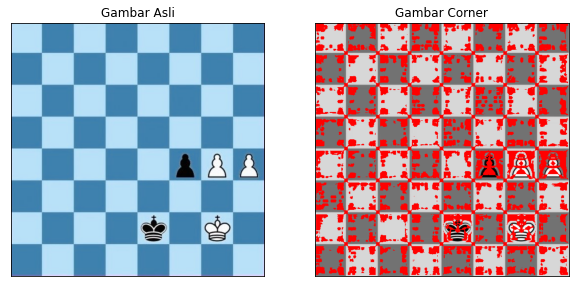

In [ ]:
# Visualisasi
plt.figure(figsize = (10,10))

plt.subplot(121)
plt.title("Gambar Asli")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("Gambar Corner")
plt.xticks([]), plt.yticks([])
plt.imshow(harris_corners)

plt.show()

In [ ]:
#tampilkan array setelah proses corner edge detector menggunakan pendekata harris corners
data = asarray(harris_corners)
print(data)

[[[215 215 215]
  [216 216 216]
  [217 217 217]
  ...
  [117 117 117]
  [122 122 122]
  [126 126 126]]

 [[214 214 214]
  [215 215 215]
  [216 216 216]
  ...
  [122 122 122]
  [126 126 126]
  [131 131 131]]

 [[215 215 215]
  [216 216 216]
  [255   0   0]
  ...
  [255   0   0]
  [122 122 122]
  [127 127 127]]

 ...

 [[119 119 119]
  [120 120 120]
  [255   0   0]
  ...
  [255   0   0]
  [221 221 221]
  [213 213 213]]

 [[119 119 119]
  [120 120 120]
  [120 120 120]
  ...
  [217 217 217]
  [215 215 215]
  [205 205 205]]

 [[118 118 118]
  [120 120 120]
  [121 121 121]
  ...
  [219 219 219]
  [217 217 217]
  [207 207 207]]]


**Blob Detector**

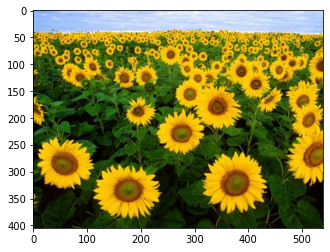

In [ ]:
img = cv2.imread('bunga_matahari.jpg') #gambar sel darah merah rgb
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

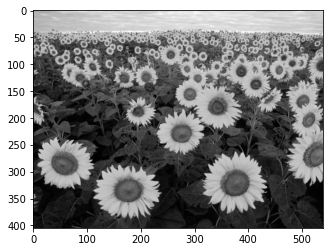

In [ ]:
img = cv2.imread('bunga_matahari.jpg',cv2.IMREAD_GRAYSCALE) #konversi dari rgb ke gray
plt.imshow(img, cmap='gray')

In [ ]:
k = 1.414
sigma = 1.0
img = img/255.0  #normalisasi gambar

Membuat fungsi LoG yang mengambil sigma sebagai input dan menghasilkan filter dengan ukuran 6 * sigma (opsi terbaik).

In [ ]:
def LoG(sigma):
    #ukuran window
    n = np.ceil(sigma*6)
    y,x = np.ogrid[-n//2:n//2+1,-n//2:n//2+1]
    y_filter = np.exp(-(y*y/(2.*sigma*sigma)))
    x_filter = np.exp(-(x*x/(2.*sigma*sigma)))
    final_filter = (-(2*sigma**2) + (x*x + y*y) ) *  (x_filter*y_filter) * (1/(2*np.pi*sigma**4))
    return final_filter

Menggabungkan gambar dengan filter Gaussian dan
gambar konvolusi dengan berbagai filter LOG

In [ ]:
def LoG_convolve(img):
    log_images = [] #untuk menyimpan respon
    for i in range(0,9):
        y = np.power(k,i) 
        sigma_1 = sigma*y #sigma 
        filter_log = LoG(sigma_1) #filter generation
        image = cv2.filter2D(img,-1,filter_log) # konvolusi gambar
        image = np.pad(image,((1,1),(1,1)),'constant') #padding 
        image = np.square(image) # mengkuadratkan respons
        log_images.append(image)
    log_image_np = np.array([i for i in log_images]) # menyimpan # ke array
    return log_image_np
log_image_np = LoG_convolve(img)
print(log_image_np.shape)

(9, 407, 542)


Membuat fungsi untuk blob detector

In [ ]:
def detect_blob(log_image_np):
    co_ordinates = [] #untuk menyimpan koordinat
    (h,w) = img.shape
    for i in range(1,h):
        for j in range(1,w):
            slice_img = log_image_np[:,i-1:i+2,j-1:j+2] #9*3*3 irisan
            result = np.amax(slice_img) #mencari maximum
            if result >= 0.03: #threshold
                z,x,y = np.unravel_index(slice_img.argmax(),slice_img.shape)
                co_ordinates.append((i+x-1,j+y-1,k**z*sigma)) #menemukan koordinat
    return co_ordinates
co_ordinates = list(set(detect_blob(log_image_np)))

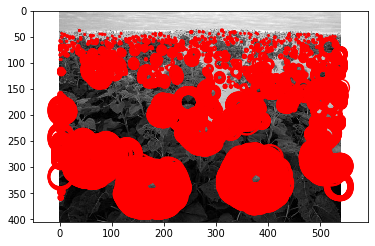

In [ ]:
#visualisasi 
fig, ax = plt.subplots()
nh,nw = img.shape
count = 0
ax.imshow(img, interpolation='nearest',cmap="gray")
for blob in co_ordinates:
    y,x,r = blob
    c = plt.Circle((x, y), r*1.414, color='red', linewidth=1.5, fill=False)
    ax.add_patch(c)
ax.plot()  
plt.show()

In [ ]:
#menampilkan array gambar yg sudah di proses oleh blob detector
data = asarray(img)
print(data)

[[0.63921569 0.63921569 0.63921569 ... 0.90588235 0.89411765 0.88627451]
 [0.62745098 0.62745098 0.62745098 ... 0.89803922 0.89019608 0.88627451]
 [0.64313725 0.64705882 0.65098039 ... 0.86666667 0.86666667 0.8627451 ]
 ...
 [0.11372549 0.10196078 0.09019608 ... 0.12156863 0.15686275 0.17254902]
 [0.1254902  0.10196078 0.08235294 ... 0.12156863 0.12156863 0.10196078]
 [0.12941176 0.09411765 0.06666667 ... 0.10588235 0.09411765 0.0627451 ]]


**Distance Transform**

In [ ]:
#input gambar mobil
target = cv2.imread("mobil.jpg")
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

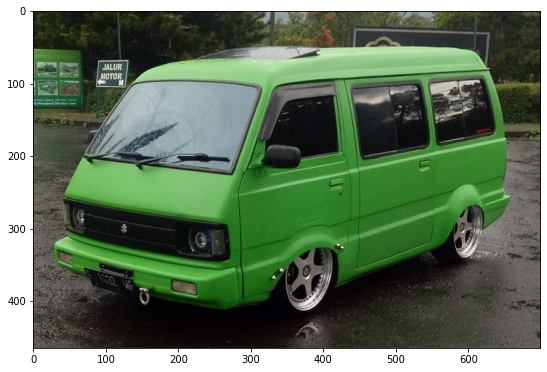

In [ ]:
#visualisasi
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 2)
plt.imshow(target, cmap='gray')

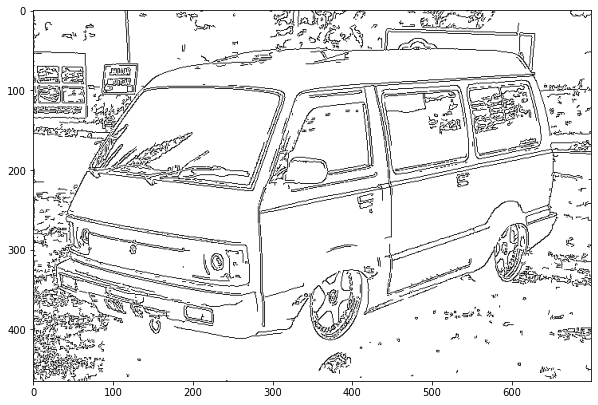

In [ ]:
#ekstraksi tepi canny
edge = cv2.Canny(target, 100, 200)
edge = np.uint8((255 - edge)/255.0)
plt.figure(figsize=(10, 7.5))
plt.imshow(edge, cmap='gray', vmin=0, vmax=1)

In [ ]:
data = asarray(edge)
print(data)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 0 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]]


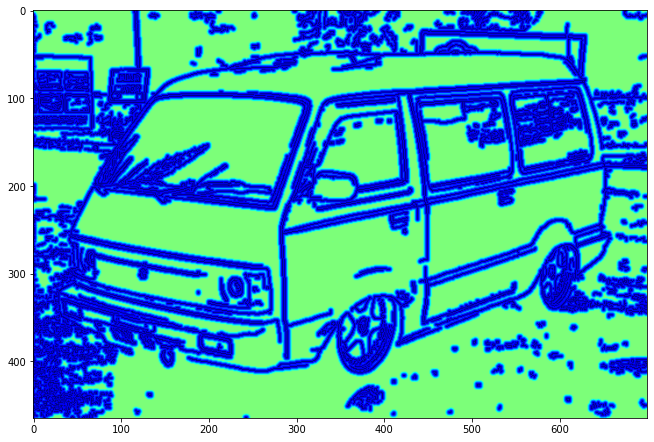

In [ ]:
#Distance Transform
#tentukan nilai distance nya
n_dist = 5
dist = cv2.distanceTransform(edge, cv2.DIST_L2, 5)
dist = np.clip(dist, 0, n_dist)
plt.figure(figsize=(15, 7.5))
plt.imshow(dist, cmap='jet', vmin=0, vmax=10)

In [ ]:
data = asarray(dist)
print(data)

[[5.        5.        5.        ... 5.        5.        5.       ]
 [4.        4.1968994 4.393799  ... 4.393799  4.1968994 4.       ]
 [3.        3.1968994 3.5968933 ... 3.5968933 3.1968994 3.       ]
 ...
 [1.        0.        1.        ... 5.        5.        5.       ]
 [0.        1.        1.3999939 ... 5.        5.        5.       ]
 [0.        1.        2.        ... 5.        5.        5.       ]]


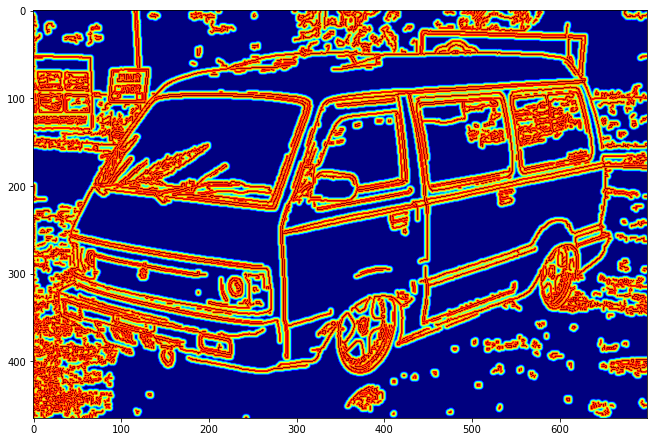

In [ ]:
h,w = target.shape[0:2]
alpha = np.ones((h, w), "float32")
alpha = 1.0 - dist/n_dist
plt.figure(figsize=(15, 7.5))
plt.imshow(alpha, cmap="jet", vmin=0, vmax=1)

In [ ]:
data = asarray(alpha)
print(data)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.19999999 0.1606201  0.12124026 ... 0.12124026 0.1606201  0.19999999]
 [0.39999998 0.36062014 0.28062135 ... 0.28062135 0.36062014 0.39999998]
 ...
 [0.8        1.         0.8        ... 0.         0.         0.        ]
 [1.         0.8        0.7200012  ... 0.         0.         0.        ]
 [1.         0.8        0.6        ... 0.         0.         0.        ]]
